In [ ]:
## Connect to google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Import data reading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Load data and print "x" data

loaded = np.load("/content/drive/MyDrive/Amazon/Amazon_100000_data/Amazon_text_to_numeric.npz")
x = loaded['a']
print(x)

[[   3  252 1471 ...    0    0    0]
 [  42 2093  108 ...    0    0    0]
 [ 219  400    5 ...    0    0    0]
 ...
 [   3   13 1755 ...    0    0    0]
 [ 170  177  627 ...    0    0    0]
 [  29  220   43 ...    0    0    0]]


In [ ]:
## Print "y" data

y = loaded['b']
print(y)

[1 1 1 ... 5 5 5]


In [ ]:
## Use categorical 

from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
print(y)

[[0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [ ]:
## Shuffle the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(x),np.array(y),test_size=0.000001,random_state = 100)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(99999, 933) (99999, 6)
(1, 933) (1, 6)


In [ ]:
## Activate GPU

import tensorflow as tf
device_name = tf.test.gpu_device_name()
with tf.device(device_name):
  pass

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

### Creating Model

embedding_vector_features = 128
voc_size = 16849

model=Sequential()
model.add(Embedding(input_dim = voc_size, output_dim = embedding_vector_features, input_length = x_train.shape[1], mask_zero = True))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(6,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 933, 128)          2156672   
                                                                 
 dropout_2 (Dropout)         (None, 933, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               91600     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 2,248,878
Trainable params: 2,248,878
Non-trainable params: 0
_________________________________________________________________


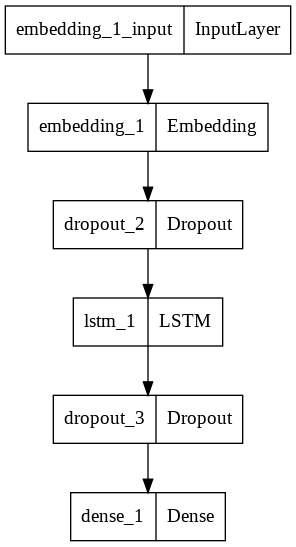

In [ ]:
## Plot the data

tf.keras.utils.plot_model(model)

In [ ]:
## Train model and used k-fold data spliting way

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold,KFold

skf = KFold(n_splits = 10, random_state = 42, shuffle = True)

i=1
score = []
with tf.device(device_name):
  for train_index, test_index in skf.split(x_train, y_train):
    print('\n\n',"*"*20,'\n')
    print(i)
    i=i+1
    print('\n',"*"*20,'\n\n')
    # print(y[train_index])
    model.fit(x_train[train_index], y_train[train_index], epochs = 30, batch_size = 128, validation_data = (x_train[test_index], y_train[test_index]))
    pred = model.predict(x_train[test_index])
    # print(pred)
    pred = np.array([np.argmax(i) for i in pred])
    # print(pred)
    true = np.array([np.argmax(i) for i in y_train[test_index]])
    # print(true)
    accu = accuracy_score(pred, true)
    score.append(accu)
    # break



 ******************** 

1

 ******************** 


Epoch 1/30
704/704 [==============================] - 59s 72ms/step - loss: 1.2334 - accuracy: 0.4658 - val_loss: 1.1302 - val_accuracy: 0.5303
Epoch 2/30
704/704 [==============================] - 49s 69ms/step - loss: 1.0378 - accuracy: 0.5721 - val_loss: 1.1041 - val_accuracy: 0.5432
Epoch 3/30
704/704 [==============================] - 49s 69ms/step - loss: 0.9408 - accuracy: 0.6226 - val_loss: 1.0917 - val_accuracy: 0.5598
Epoch 4/30
704/704 [==============================] - 49s 69ms/step - loss: 0.8600 - accuracy: 0.6633 - val_loss: 1.1065 - val_accuracy: 0.5623
Epoch 5/30
704/704 [==============================] - 49s 69ms/step - loss: 0.7895 - accuracy: 0.6932 - val_loss: 1.1191 - val_accuracy: 0.5679
Epoch 6/30
704/704 [==============================] - 48s 69ms/step - loss: 0.7240 - accuracy: 0.7206 - val_loss: 1.1703 - val_accuracy: 0.5645
Epoch 7/30
704/704 [==============================] - 48s 69ms/step - loss: 0.6657

In [ ]:
## Predicting model

print(np.array(score).mean())

In [ ]:
## save the model

model.save('/content/drive/MyDrive/Amazon/Amazon_100000_data/model_1.h5')